# Imports and Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import statistics
from collections import Counter
import re
from nltk.corpus import stopwords

sns.set_theme(style="darkgrid")

%matplotlib inline

In [2]:
pd.set_option('max_colwidth', None)

# Load Data

In [3]:
df = pd.read_csv(filepath_or_buffer = "./data/datframe_subtask1_2.csv")
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu belügen, unverständlich",OFFENSE,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten zu müssen, deshalb sind die Führer treu und senden jeden Dreck, Lüge...",OFFENSE,ABUSE


# Data Analysis

In [4]:
df.iloc[:,1].value_counts()

OTHER      2061
OFFENSE     970
Name: binaereKlassifikation, dtype: int64

In [5]:
df.iloc[:,2].value_counts()

OTHER        2061
INSULT        459
ABUSE         400
PROFANITY     111
Name: granulareKlassifikation, dtype: int64

In [6]:
#df.sample(50)

# Data Preparation

In [7]:
#df.sample(50)

In [8]:
buffer_array = df.iloc[:,0].to_numpy()

In [9]:
linked_list = []
hashtag_list = []
tweet_list = []
utf_list = []
emoji_list = []
w_o_punctuation_list = []

emoji_list_default = [":D",":)",":(",":/","B)","8)","xD","XD","^^","._."
              ,":-D",":-)",":-(",":-/","B-)","8-)","x-D","X-D",":'-("]

stop_words = ["|LBR|"," ",""]



for i in buffer_array:
    help_array_linked = []
    help_array_hash = []
    help_array_utf = []
    help_array_emoji = []
    help_array_w_o_punctuaton = []
    
    word_list = i.split(" ")
    index_count = 0
    for i in word_list:
        if i.startswith('\\"'): # ging mit replace irgendwie nicht
            help_list = i.split('\\""')
            for l in help_list:
                if l != '':
                    word_list[index_count] = l
                    break
        if word_list[index_count].startswith('*') and word_list[index_count].endswith('*'):
            word_list[index_count] = i.replace('*', ' ')
        if '&amp;' in word_list[index_count]:
            word_list[index_count] = i.replace('&amp;', 'und')
        if '&lt;3' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;3', '<3')
        if '&lt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;', 'kleiner als')
        if '&rt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&rt;', 'groesser als')
        if "@" in i:
            help_array_linked.append(i)
        if "#" in i:
            help_array_hash.append(i)
            word_list[index_count] = i.replace("#","")
        if "<U+" in i:
            buffer = i.split("<")
            i = buffer[0]
#             buffer[1]=utf
            word_list[index_count] = i
            for code in buffer[1:]:
                if code[0]!="<":
                    code = "<"+code
                help_array_utf.append(code)
        if i in emoji_list_default:
            help_array_emoji.append(i)
        if i in stop_words:
            word_list.remove(i)

        index_count = index_count+1
        
    for i in help_array_linked:
        word_list.remove(i)
    for i in help_array_emoji:
        word_list.remove(i)
    for i in word_list:
        buffer_word = i.translate(str.maketrans('', '', string.punctuation))
        help_array_w_o_punctuaton.append(buffer_word)
    

        
        
    linked_list.append(help_array_linked)
    hashtag_list.append(help_array_hash)
    tweet_list.append(word_list)
    utf_list.append(help_array_utf)
    emoji_list.append(help_array_emoji)
    w_o_punctuation_list.append(help_array_w_o_punctuaton)

df["Wörter in Tweet"] = tweet_list
df["Wörter pro Tweet"]="-"
df["Tweets ohne Satzzeichen"] = w_o_punctuation_list
df["Wortlänge"] = "-"
df["Durchschnittliche Wortlänge"] = "-"
df["Verlinkungen"]=linked_list
df["Verlinkung pro Tweet"] =  "-"
df["Hashtags"]=hashtag_list
df["Hashtags pro Tweet"] =  "-"
df["utf Codes"]=utf_list
df["utf Codes pro Tweet"] =  "-"
df["Emojis"] = emoji_list
df["Emojis pro Tweet"] =  "-"



In [10]:
for index, row in df.iterrows():
    word_list = row["Wörter in Tweet"]
    char_list = row["Tweets ohne Satzzeichen"]
    link_list = row["Verlinkungen"]
    hash_list = row["Hashtags"]
    utf_list  = row["utf Codes"]
    emoj_list = row["Emojis"]
    
    word_count = len(word_list)
    link_count = len(link_list)
    hash_count = len(hash_list)
    utf_count  = len(utf_list)
    emoj_count = len(emoj_list)
    
    char_array = []
    
    for i in char_list:
        char_array.append(len(i))
    avg_length = round(statistics.mean(char_array),2)
    
    df.loc[index,"Wörter pro Tweet"] = word_count
    df.loc[index,"Wortlänge"] = char_array
    df.loc[index,"Durchschnittliche Wortlänge"] = avg_length
    df.loc[index,"Verlinkung pro Tweet"] = link_count
    df.loc[index,"Hashtags pro Tweet"] = hash_count
    df.loc[index,"utf Codes pro Tweet"] = utf_count
    df.loc[index,"Emojis pro Tweet"] = emoj_count
    

In [11]:
for x in df['Wörter in Tweet']:
    index_count = 0
    for w in x:
        x[index_count] = w.lower()
        index_count = index_count + 1


# Analyse Sonderzeichen

In [12]:
for x in df['Wörter in Tweet']:
        for w in x:
            if not re.search("^[a-zA-Z0-9,.äöüßÄÖÜ!?]*$", w):
                print(w)

87%
männer\"genannt,
empörung\"besser....herrlich,
dame\"ist
09/2015
berichten\"
33-45
männern\"hat
falsche\"richtige
12%
gibt's
22-jährigen
chemnitz:
hammer-umfrage:
-
fdp-chef
-
bleiben\"gott
\""islamophobie\""!
-
iran-sanktionen
maas/deutschland
-
inhalte\""!
-
offenheit\"mit
anderen:
40°
mohammedkult-chauvinisten!
seenotrettung™
(krimineller
schleuserfährdienst)
™
-
\""universitäten\""!
#commiesraus
klima\"und
hätte:
augenblicks-aktionismus!
100%
10%
-
-
rassismus\"den
reich\"war
(!)
(0)
(im
land!)
schutzsuchenden™
flüchtlinge™
schengen-deal
eu-weit
eu-drittländer
vorderasien-orient-afrika
jahrzehnte-lang
vater\"gesehen
leichte\"gebietsreduktion,
bundesverfassungsgerichts:
\""reichsbürger\""!
valentin-orden
(neudeutsch
valentin-museum
\""frauenfeindlich\""!
reichsbürger\"und
deutschlands:
blut-
(wie
usa)
|lbr|
ernsthaft:
(!)
tweet-impressions
\""live\"gesehen!
alternativlosigkeit\"des
(mit
-
deutschland:
-heimattreue<u+0001f499><u+0001f1e9><u+0001f1ea><u+0001f44d>
-vollhonks
widmun

In [13]:
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT,"[komisch, das, die, realitätsverweigerung, immer, von, linken, erbärmlichen, correctiv, accounts, ausgeht...]",11,"[Komisch, das, die, Realitätsverweigerung, immer, von, linken, erbärmlichen, Correctiv, Accounts, ausgeht]","[7, 3, 3, 21, 5, 3, 6, 12, 9, 8, 7]",7.64,"[@JanZimmHHB, @mopo]",2,[],0,[],0,[],0
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE,"[cdu, steht, seid, strauss,, kohl,, schäuble,, vdleyen, für, korruption,, schwarzgeld,, und, dies, überall...]",13,"[CDU, steht, seid, Strauss, Kohl, Schäuble, vdLeyen, für, Korruption, Schwarzgeld, und, dies, überall]","[3, 5, 4, 7, 4, 8, 7, 3, 10, 11, 3, 4, 7]",5.85,"[@faznet, @Gruene_Europa, @SPDEuropa, @CDU]",4,[],0,[],0,[],0
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER,"[die, gesichter,, namen,, religion, der, täter, würde, zur, aufklärung, beitragen...]",10,"[Die, Gesichter, Namen, Religion, der, Täter, würde, zur, Aufklärung, beitragen]","[3, 9, 5, 8, 3, 5, 5, 3, 10, 9]",6,[@DLFNachrichten],1,[],0,[],0,[],0
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu belügen, unverständlich",OFFENSE,ABUSE,"[wie, verwirrt, muss, man, sein, um, sich, zu, weigern, die, tatsachen, anzuerkennen,, das, dieser, hass, von, ferkel, importiert, wurde....was, bezweckt, man, damit, sich, selber, so, zu, belügen,, unverständlich]",28,"[Wie, verwirrt, muss, man, sein, um, sich, zu, weigern, die, Tatsachen, anzuerkennen, das, dieser, Hass, von, Ferkel, importiert, wurdewas, bezweckt, man, damit, sich, selber, so, zu, belügen, unverständlich]","[3, 8, 4, 3, 4, 2, 4, 2, 7, 3, 9, 12, 3, 6, 4, 3, 6, 10, 8, 8, 3, 5, 4, 6, 2, 2, 7, 14]",5.43,[@welt],1,[],0,[],0,[],0
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten zu müssen, deshalb sind die Führer treu und senden jeden Dreck, Lüge...",OFFENSE,ABUSE,"[weil, die, afd, den, ferkelfunk, abschaffen, will,, deshalb, haben, die, linken, zecken,, schmarotzer, angst, für, ihr, kacken, arbeiten, zu, müssen,, deshalb, sind, die, führer, treu, und, senden, jeden, dreck,, lüge...]",30,"[Weil, die, AfD, den, Ferkelfunk, abschaffen, will, deshalb, haben, die, Linken, Zecken, Schmarotzer, Angst, für, ihr, kacken, arbeiten, zu, müssen, deshalb, sind, die, Führer, treu, und, senden, jeden, Dreck, Lüge]","[4, 3, 3, 3, 10, 10, 4, 7, 5, 3, 6, 6, 11, 5, 3, 3, 6, 8, 2, 6, 7, 4, 3, 6, 4, 3, 6, 5, 5, 4]",5.17,"[@hacker_1991, @torben_braga]",2,[],0,[],0,[],0


In [14]:
df.describe()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
count,3031,3031,3031,3031,3031,3031,3031,3031.0,3031,3031,3031,3031,3031,3031,3031,3031
unique,3031,2,4,3031,53,3031,3029,427.0,1187,18,496,9,260,13,13,4
top,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OTHER,OTHER,"[komisch, das, die, realitätsverweigerung, immer, von, linken, erbärmlichen, correctiv, accounts, ausgeht...]",9,"[Komisch, das, die, Realitätsverweigerung, immer, von, linken, erbärmlichen, Correctiv, Accounts, ausgeht]","[6, 2, 3, 5, 3, 4, 2, 3, 6, 3, 4, 3, 7, 11]",5.0,[],0,[],0,[],0,[],0
freq,1,2061,2061,1,144,1,2,83.0,1119,1119,2303,2303,2523,2523,2964,2964


# Exploratory Data Analysis

In [15]:
df["binaereKlassifikation"].unique()

array(['OFFENSE', 'OTHER'], dtype=object)

In [16]:
df["granulareKlassifikation"].unique()

array(['INSULT', 'ABUSE', 'OTHER', 'PROFANITY'], dtype=object)

In [17]:
df[df["binaereKlassifikation"]=="OTHER"]["granulareKlassifikation"].unique()

array(['OTHER'], dtype=object)

In [18]:
OTHER_df = df[df["granulareKlassifikation"]=="OTHER"]
INSULT_df = df[df["granulareKlassifikation"]=="INSULT"]
ABUSE_df = df[df["granulareKlassifikation"]=="ABUSE"]
PROFANITY_df = df[df["granulareKlassifikation"]=="PROFANITY"]

In [19]:
print("Tweetlänge bei OTHER: " + str(round(OTHER_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei INSULT: " + str(round(INSULT_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei ABUSE: " + str(round(ABUSE_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei PROFANITY: " + str(round(PROFANITY_df["Wörter pro Tweet"].mean(),2)))

Tweetlänge bei OTHER: 19.06
Tweetlänge bei INSULT: 22.0
Tweetlänge bei ABUSE: 25.44
Tweetlänge bei PROFANITY: 20.97


In [20]:
print("Durchschnittliche Wortlänge bei OTHER: " + str(round(OTHER_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei INSULT: " + str(round(INSULT_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei ABUSE: " + str(round(ABUSE_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei PROFANITY: " + str(round(PROFANITY_df["Durchschnittliche Wortlänge"].mean(),2)))

Durchschnittliche Wortlänge bei OTHER: 5.34
Durchschnittliche Wortlänge bei INSULT: 5.51
Durchschnittliche Wortlänge bei ABUSE: 5.85
Durchschnittliche Wortlänge bei PROFANITY: 5.18


In [21]:
print("Durchschnittliche Anzahl Hashtags bei OTHER: " + str(round(OTHER_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei INSULT: " + str(round(INSULT_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei ABUSE: " + str(round(ABUSE_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei PROFANITY: " + str(round(PROFANITY_df["Hashtags pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Hashtags bei OTHER: 0.46
Durchschnittliche Anzahl Hashtags bei INSULT: 0.5
Durchschnittliche Anzahl Hashtags bei ABUSE: 0.51
Durchschnittliche Anzahl Hashtags bei PROFANITY: 0.47


In [22]:
print("Durchschnittliche Anzahl Verlinkung bei OTHER: " + str(round(OTHER_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei INSULT: " + str(round(INSULT_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei ABUSE: " + str(round(ABUSE_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei PROFANITY: " + str(round(PROFANITY_df["Verlinkung pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Verlinkung bei OTHER: 1.48
Durchschnittliche Anzahl Verlinkung bei INSULT: 1.93
Durchschnittliche Anzahl Verlinkung bei ABUSE: 1.72
Durchschnittliche Anzahl Verlinkung bei PROFANITY: 0.63


In [23]:
print("Durchschnittliche Anzahl Emojis bei OTHER: " + str(round(OTHER_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei INSULT: " + str(round(INSULT_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei ABUSE: " + str(round(ABUSE_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei PROFANITY: " + str(round(PROFANITY_df["Emojis pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Emojis bei OTHER: 0.03
Durchschnittliche Anzahl Emojis bei INSULT: 0.01
Durchschnittliche Anzahl Emojis bei ABUSE: 0.0
Durchschnittliche Anzahl Emojis bei PROFANITY: 0.05


In [24]:
print("Durchschnittliche Anzahl utf Codes bei OTHER: " + str(round(OTHER_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei INSULT: " + str(round(INSULT_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei ABUSE: " + str(round(ABUSE_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei PROFANITY: " + str(round(PROFANITY_df["utf Codes pro Tweet"].mean(),2)))

Durchschnittliche Anzahl utf Codes bei OTHER: 0.34
Durchschnittliche Anzahl utf Codes bei INSULT: 0.34
Durchschnittliche Anzahl utf Codes bei ABUSE: 0.56
Durchschnittliche Anzahl utf Codes bei PROFANITY: 0.27


In [25]:
#df.sample(n = 50, random_state = 4711)

## Plots

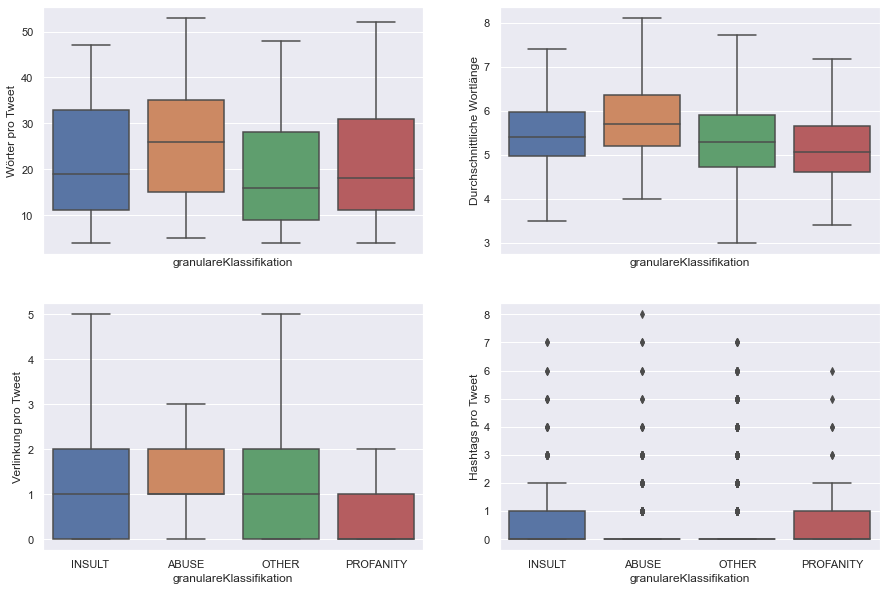

In [26]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex = True
                        )

ax0 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Wörter pro Tweet"
                  ,showfliers = False
                  ,ax = axes[0,0]
                 )

ax1 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Durchschnittliche Wortlänge"
                  ,showfliers = False
                  ,ax = axes[0,1]
                 )

ax2 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Verlinkung pro Tweet"
                  ,showfliers = False
                  ,ax = axes[1,0]
                 )

ax3 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Hashtags pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,1]
                 )

# ax4 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,0]
#                  )

# ax5 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Emojis pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,1]
#                  )

In [27]:
# fig, axes = plt.subplots(nrows = 2
#                          ,ncols = 2
#                          ,figsize=(15,10)
# #                          ,sharex = True
#                         )

# ax0 = sns.violinplot(data = df
#                       ,x = "granulareKlassifikation"
#                       ,y = "Wörter pro Tweet"
#     #                   ,showfliers = False
#                       ,ax = axes[0,0]
#                      )

# ax1 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Durchschnittliche Wortlänge"
# #                   ,showfliers = False
#                   ,ax = axes[0,1]
#                  )

# ax2 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Verlinkung pro Tweet"
# #                   ,showfliers = False
#                   ,ax = axes[1,0]
#                  )

# ax3 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Hashtags pro Tweet"
# #                   ,showfliers = False
#                   ,ax = axes[1,1]
#                  )

# # ax4 = sns.violinplot(data = df
# #                   ,x = "granulareKlassifikation"
# #                   ,y = "utf Codes pro Tweet"
# #                   ,showfliers = False
# #                   ,ax = axes[2,0]
# #                  )

# # ax5 = sns.violinplot(data = df
# #                   ,x = "granulareKlassifikation"
# #                   ,y = "Emojis pro Tweet"
# #                   ,showfliers = False
# #                   ,ax = axes[2,1]
# #                  )

In [28]:
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT,"[komisch, das, die, realitätsverweigerung, immer, von, linken, erbärmlichen, correctiv, accounts, ausgeht...]",11,"[Komisch, das, die, Realitätsverweigerung, immer, von, linken, erbärmlichen, Correctiv, Accounts, ausgeht]","[7, 3, 3, 21, 5, 3, 6, 12, 9, 8, 7]",7.64,"[@JanZimmHHB, @mopo]",2,[],0,[],0,[],0
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE,"[cdu, steht, seid, strauss,, kohl,, schäuble,, vdleyen, für, korruption,, schwarzgeld,, und, dies, überall...]",13,"[CDU, steht, seid, Strauss, Kohl, Schäuble, vdLeyen, für, Korruption, Schwarzgeld, und, dies, überall]","[3, 5, 4, 7, 4, 8, 7, 3, 10, 11, 3, 4, 7]",5.85,"[@faznet, @Gruene_Europa, @SPDEuropa, @CDU]",4,[],0,[],0,[],0
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER,"[die, gesichter,, namen,, religion, der, täter, würde, zur, aufklärung, beitragen...]",10,"[Die, Gesichter, Namen, Religion, der, Täter, würde, zur, Aufklärung, beitragen]","[3, 9, 5, 8, 3, 5, 5, 3, 10, 9]",6,[@DLFNachrichten],1,[],0,[],0,[],0
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu belügen, unverständlich",OFFENSE,ABUSE,"[wie, verwirrt, muss, man, sein, um, sich, zu, weigern, die, tatsachen, anzuerkennen,, das, dieser, hass, von, ferkel, importiert, wurde....was, bezweckt, man, damit, sich, selber, so, zu, belügen,, unverständlich]",28,"[Wie, verwirrt, muss, man, sein, um, sich, zu, weigern, die, Tatsachen, anzuerkennen, das, dieser, Hass, von, Ferkel, importiert, wurdewas, bezweckt, man, damit, sich, selber, so, zu, belügen, unverständlich]","[3, 8, 4, 3, 4, 2, 4, 2, 7, 3, 9, 12, 3, 6, 4, 3, 6, 10, 8, 8, 3, 5, 4, 6, 2, 2, 7, 14]",5.43,[@welt],1,[],0,[],0,[],0
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten zu müssen, deshalb sind die Führer treu und senden jeden Dreck, Lüge...",OFFENSE,ABUSE,"[weil, die, afd, den, ferkelfunk, abschaffen, will,, deshalb, haben, die, linken, zecken,, schmarotzer, angst, für, ihr, kacken, arbeiten, zu, müssen,, deshalb, sind, die, führer, treu, und, senden, jeden, dreck,, lüge...]",30,"[Weil, die, AfD, den, Ferkelfunk, abschaffen, will, deshalb, haben, die, Linken, Zecken, Schmarotzer, Angst, für, ihr, kacken, arbeiten, zu, müssen, deshalb, sind, die, Führer, treu, und, senden, jeden, Dreck, Lüge]","[4, 3, 3, 3, 10, 10, 4, 7, 5, 3, 6, 6, 11, 5, 3, 3, 6, 8, 2, 6, 7, 4, 3, 6, 4, 3, 6, 5, 5, 4]",5.17,"[@hacker_1991, @torben_braga]",2,[],0,[],0,[],0


In [29]:
# Combine german stopwords from nltk with additional stopwords
german_stopwords1 = []
with open('./data/stop_words_german.txt', encoding="utf-8") as f:
    for line in f:
        line = line.replace('\n','')
        german_stopwords1.append(line)

german_stopwords2 = stopwords.words("german")

german_stopwords = german_stopwords1 + german_stopwords2

In [30]:
# words in tweet as one string 
data = df
data["tweets_clean"] = [" ".join(word) for word in data["Wörter in Tweet"]] 

# drop unicode emojis and LBR
new_tweet_ls = []
for tweet in data.tweets_clean:
    tweet_sp = tweet.split()
    for word in tweet_sp:
        if any(x in word for x in ["000", "LBR", "lbr"]) :
            tweet = tweet.replace(word, "")
        
    new_tweet_ls.append(tweet)

data["tweets_clean"] = new_tweet_ls


In [31]:
data.to_csv('./data/prepared_dataframe.csv',index=False)